In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
intentos = [1, 2, 3, 4, 5]
datos_exp = { 
    'TH(k_ohm)' : [7.87, 23, 61, 133.4, 210], 
    'TC(k_ohm)' : [254, 274.7, 293.2, 313.9, 322.7], 
    'TH(C)'     : [90, 59, 36, 19, 9.5],
    'TC(C)'     : [6, 4.5, 3.5, 2.5, 1.5], 
    'VH'        : [10.9, 8.9, 6.9, 4.9, 2.9], 
    'IH'        : [2.07, 1.68, 1.24, 0.9, 0.56], 
    'Vw'        : [1.898, 1.253, 0.733, 0.373, 0.180]
             }

df_exp = pd.DataFrame(datos_exp, index=intentos)

In [269]:
df_exp = df_exp.set_index(pd.Index(intentos))
df_exp.index.name = 'Intento'  # Set the index name

df_exp

df_exp

,TH(k_ohm),TC(k_ohm),TH(C),TC(C),VH,IH,Vw
Intento,,,,,,,
1,7.87,254.0,90.0,6.0,10.9,2.07,1.898
2,23.00,274.7,59.0,4.5,8.9,1.68,1.253
3,61.00,293.2,36.0,3.5,6.9,1.24,0.733
4,133.40,313.9,19.0,2.5,4.9,0.90,0.373
5,210.00,322.7,9.5,1.5,2.9,0.56,0.180


In [270]:
df_res = pd.DataFrame()

In [271]:
resistencia = 2

In [272]:
# Potencia suministrada al depósito caliente (PH)
df_res['PH'] = df_exp['VH'] / df_exp['IH']

# Potencia utilizada por la resistencia de carga (PW)
df_res['Pw'] = (df_exp['Vw'] ** 2) / resistencia

#Temperaturas de celsius a kelvin (K)
df_res['TH(k)'] = df_exp['TH(C)'] + 273.15
df_res['TC(k)'] = df_exp['TC(C)'] + 273.15

# Diferencia de temperatura (dT)
df_res['dT(k)'] = df_res['TH(k)'] - df_res['TC(k)']

#eficiencias
df_res['e_real'] = df_res['Pw'] / df_res['PH']
df_res['e_Carnot'] = df_res['dT(k)'] / df_res['TH(k)']

In [273]:
df_res

,PH,Pw,TH(k),TC(k),dT(k),e_real,e_Carnot
Intento,,,,,,,
1,5.265700,1.801202,363.15,279.15,84.0,0.342063,0.231309
2,5.297619,0.785004,332.15,277.65,54.5,0.148181,0.164082
3,5.564516,0.268645,309.15,276.65,32.5,0.048278,0.105127
4,5.444444,0.069565,292.15,275.65,16.5,0.012777,0.056478
5,5.178571,0.016200,282.65,274.65,8.0,0.003128,0.028304


Para comparar la eficiencia real con la eficiencia de Carnot, construya un gráfico. <br>Grafique la eficiencia de Carnot
frente a ∆T y también grafique la eficiencia real frente a ∆T.<br> Esto podría ser hecho en el mismo gráfico.

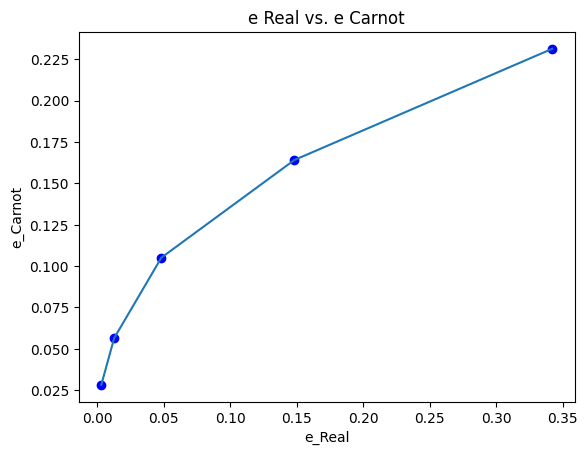

In [283]:
plt.plot(df_res['e_real'], df_res['e_Carnot'], 'bo')
plt.plot(df_res['e_real'], df_res['e_Carnot'], '-')

plt.xlabel('e_Real')
plt.ylabel('e_Carnot')

plt.title('e Real vs. e Carnot')
plt.show()


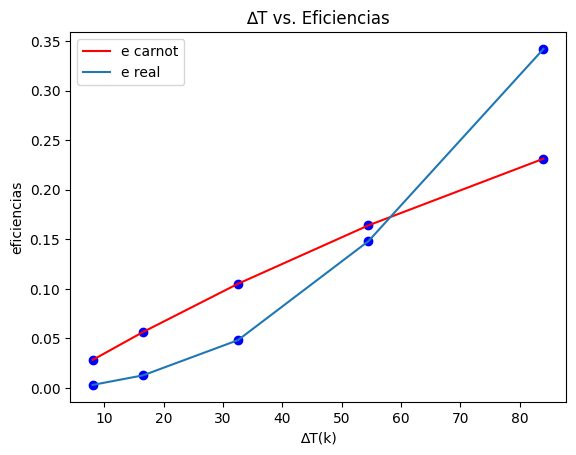

In [284]:
plt.plot( df_res['dT(k)'], df_res['e_Carnot'], 'bo')
plt.plot( df_res['dT(k)'], df_res['e_Carnot'], 'r-', label = 'e carnot')

plt.plot( df_res['dT(k)'], df_res['e_real'],'bo')
plt.plot( df_res['dT(k)'], df_res['e_real'],'-', label = "e real")

plt.ylabel('eficiencias')
plt.xlabel('∆T(k)')

plt.legend()
plt.title('∆T vs. Eficiencias')

plt.show()